In [1]:
import pandas as pd
from AdalineSGD import AdalineSGD
import matplotlib.pyplot as plt
import numpy as np
from plot_decision_region import plot_decision_region

In [2]:
# 获取数据
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header=None)
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-versicolor', -1, 1)
x = df.iloc[0:100, [0, 2]].values

# 对数据进行标准化
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

使用fit方法训练AdalineSGD模型,使用plot_decision_regions对训练结果画图

In [3]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(x_std, y)

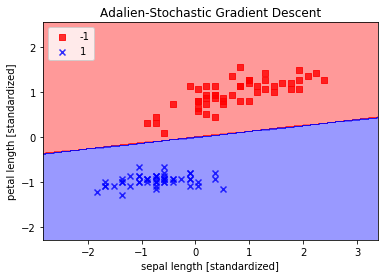

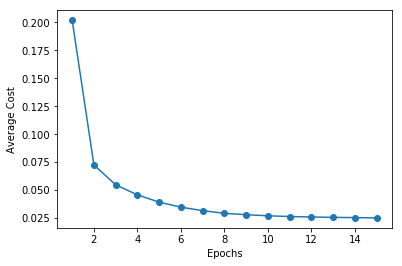

In [7]:
plot_decision_region(x_std, y, classifier=ada)
plt.title('Adalien-Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

从上面可以看出,平均损失下降非常快,在15迭代后和使用梯度下降的决策界非常相似.

如果要在在线环境中更新模型参数,通过调用partial_fit方法即可